# 🕵🏻‍♂️ Explorační datová analýza

V tomto Jupyter Notebooku si ukážeme některé vizualizace a metriky, které se používají při explorační analýze dat (angl. exploratory data analysis). Prozkoumáme data o [infarktech](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) ❤️‍🩹.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Oproti minulému cvičení využijeme balíček [seaborn](https://seaborn.pydata.org) pro vizualizaci našich výstupů. Seaborn je balíček nástrojů pro statistické grafy 📊 operující nad sloupci v pandas 🐼. Pandas i seaborn jsou balíčky implementované nad Matplotlib a nabízí vysokoúrovňové API, které umožňuje snadno získat vizuálně atraktivní a komplexní grafy.

In [2]:
# styling
sns.set_style("darkgrid")

palette = sns.color_palette("hls", 10)
sns.set_palette(palette)

In [3]:
df = pd.read_csv("data/heart.csv")
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


🩺 Dataset obsahuje 14 příznaků včetně výstupní třídy (_output_):
* age - věk pacienta
* sex - pohlaví pacienta
* cp (chest pain) - typ bolesti na hrudi (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)
* trtbps - klidový tlak (v mm Hg)
* chol - cholesterol (v mg/dl) získaný pomocí BMI senzoru
* fbs -  hladina cukru v krvi nalačno > 120 mg/dl (1: ano, 0: ne)
* rest_ecg - klidové elektrokardiografické výsledky (0: v normě, 1: s abnormalitou ST-T vlny, 2: vykazujíce pravděpodobnou alebo definitivní hypertrofii levé komory)
* thalach - maximální naměřený srdeční tep
* exng - angina vyvolaná po tělesné námaze (1: ano, 0: ne)
* oldpeak - ST deprese vyvolaná cvičením v porovnání s odpočinkem
* slp - sklon vrcholu ST segmentu (0: unsloping, 1: flat, 2: downsloping)
* caa - počet hlavních cév (0-3)
* thall - thalassemia (0: null, 1: opravená závada, 2: normální, 3: odstranitelná vada)
* output - infarkt (0: menší šance, 1: větší šance)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Vidíme, že se v datasetu nevyskytují žádné chybějící hodnoty a všechny příznaky až na jeden (_oldpeak_) jsou celočíselné. Na základě popisu příznaků víme, že některé jsou kategorické (_sex_, _cp_ apod.). Takové příznaky bychom měli nejdříve přetypovat 🙈, ale pro urychlení demonstrace explorační analýzy tento krok nyní vynecháme. 

Za ⭐️**domácí úkol**⭐️ zkuste příslušné příznaky přetypovat. Poté restartujte kernel a pusťte notebook znovu, abyste viděli, jak se jednotlivé funkce chovají i s nenumerickými daty. Né všechny je totiž zvládají. 🙅 

☝️ Pojďme dataset prozkoumat pomocí funkcí `describe()` a `corr()`. `describe()` nám vypíše některé popisné statistiky jednotlivých numerických příznaků jako je minimální a maximální hodnota, odhad střední hodnoty apod. `corr()` zobrazuje hodnotu Pearsonova korelačního koeficientu mezi dvojicí příznaků.

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dfcorr = df.corr()
dfcorr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Výstup tak velké korelační matice nemusí být pro každého přehledný, a tak můžete využít jednoduchou vizualizaci pomocí **podbarvení hodnot** (tzv. heatmapa):

In [7]:
dfcorr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Ani tato vizualizace není ideální. Co byste na ní vylepšili? 🧚🏻‍♀️ 

Implementaci si můžete opět vyzkoušet za ⭐️**domácí úkol**⭐️ spolu s vizualizací pomocí [sns.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

## 1️⃣ Univariační popisné statistiky

V této části se zaměříme na analýzu jednotlivých příznaků 🔎 . Pomůžeme si dvěma funkcemi, které si vytvoříme: 

První funkce zobrazí četnost, relativní četnost a vizualizace pro **kategorická data** 🔠.

In [8]:
# univariate descriptive statistics for categorical data
def univariate_cat_ds(df, column):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True) 
    })
    
    display(stats_df)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    
    sns.countplot(data=df, x=column, order = df[column].value_counts().index, ax=ax1)
    # adds labels above bars
    ax1.bar_label(ax1.containers[0])
    
    ax2.pie(stats_df['Frequency'], labels=stats_df.index, autopct='%1.1f%%')

Pojďme se podívat na příznak vypovídající o typu bolesti na hrudi (_cp_). Z výstupu funkce `univariate_cat_ds()` vidíme, že nejčastější hodnotou (více než 47 % ze všech pozorování) je 0 (typical angina). 📊

,Frequency,Relative frequency
0,143,0.471947
2,87,0.287129
1,50,0.165017
3,23,0.075908


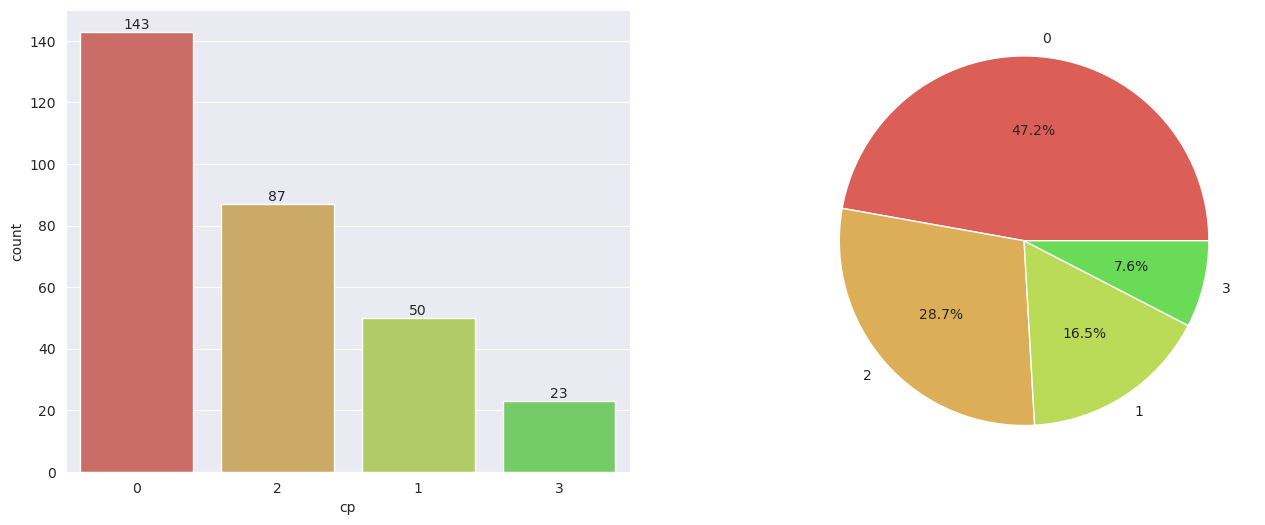

In [9]:
univariate_cat_ds(df, 'cp')

Pro spojité příznaky 🔢 použijeme druhou funkci - `univariate_cont_ds()`, která také vypíše některé popisné statistiky a zobrazí graf s (odhadem) rozdělením dat. 📊

In [10]:
# univariate descriptive statistics for continuous data
def univariate_cont_ds(df, column):
    stats_df = pd.DataFrame(np.array([
        ["Minimal value", df[column].min()], 
        ["Maximal value", df[column].max()], 
        ["Range", df[column].max() - df[column].min()],
        ["Average", df[column].mean()],
        ["Median", df[column].median()],
        ["Variance", df[column].var()]
    ]), columns=['Title', 'Value'])
    
    display(stats_df)
    
    # figure layout initialization
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :]) 
    ax2 = fig.add_subplot(spec[1, 0]) 
    ax3 = fig.add_subplot(spec[1, 1])
    
    sns.histplot(data=df, x=column, kde=True, ax=ax1)
    
    # x and y - rotation of plots
    sns.boxplot(data=df, y=column, ax=ax2, medianprops={"color": "pink"})
    sns.violinplot(data=df, y=column, ax=ax3)

Pojďme prozkoumat maximální naměřený srdeční tep pacientů (_thalachh_) 🩺. Z výstupu funkce vidíme např. to, že nejnižší zaznamenaný tep byl 71 a nejvyšší 202. Medián je pak 153.

👀 Co reprezentuje ten osamocený bod ve spodní části krabicového grafu?

,Title,Value
0,Minimal value,71
1,Maximal value,202
2,Range,131
3,Average,149.64686468646866
4,Median,153.0
5,Variance,524.6464057001724


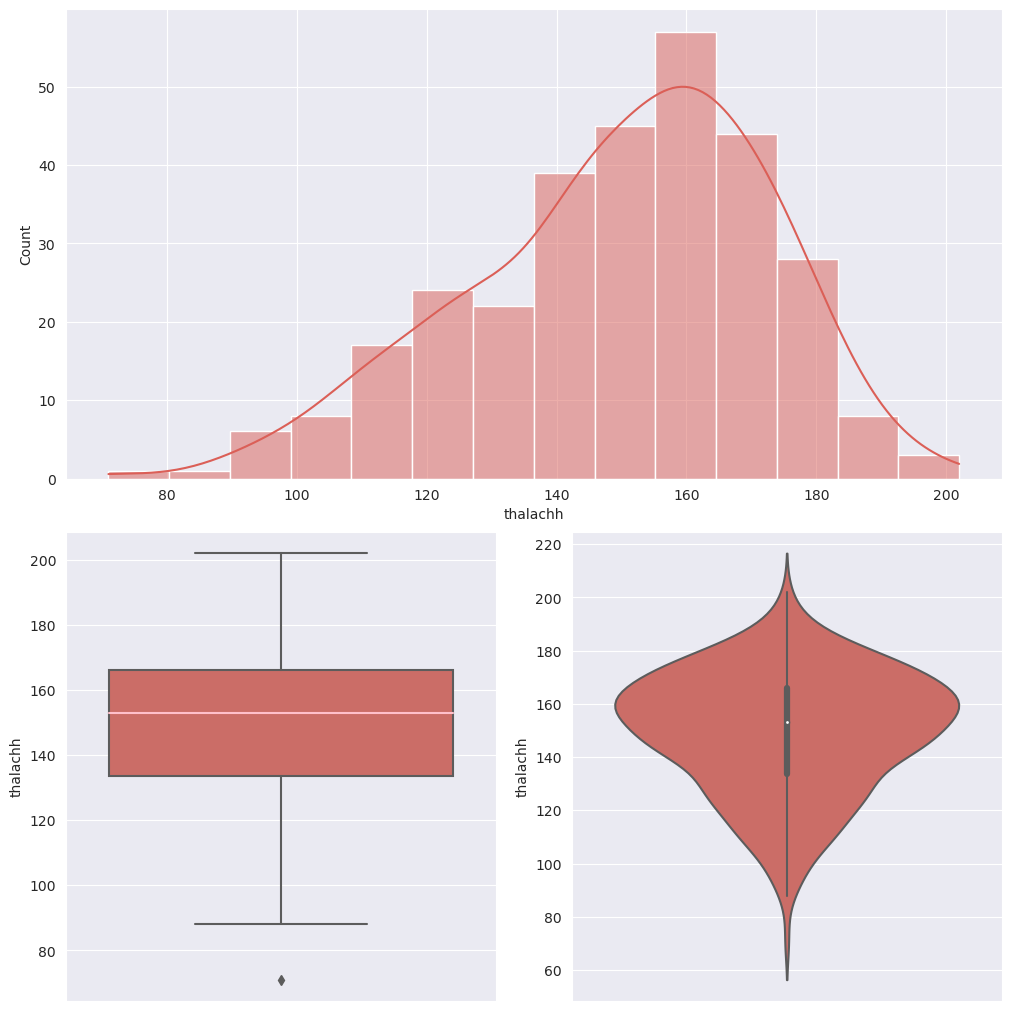

In [11]:
univariate_cont_ds(df, 'thalachh')

## 2️⃣ Bivariační popisné statistiky

Pomocí bivariačních popisných statistik zkoumáme vztah mezi dvěmi příznaky 🖇. Příkladem takového vztahu může být korelace.

Právě ta nám může pomoci při predikci - pokud víme, že nějaký příznak koreluje s vysvětlovanou proměnnou, pak bychom jej pro predikci měli použít. Pokud vidíme korelaci mezi dvěma příznaky, může se stát, že je jeden z nich např. redudantní.

🔠 & 🔠: Pojďme si definovat funkci pro průzkum **dvou kategorických příznaků**:

In [12]:
# bivariate descriptive statistics for two categorical variables
def bivariate_cat_cat_ds(df, categorical1, categorical2):
    frequency_table = pd.crosstab(df[categorical1], df[categorical2])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    
    sns.heatmap(frequency_table, cmap='Blues', annot=True, fmt='g', ax=ax1)
    sns.heatmap(frequency_table.div(len(df)), cmap='Blues', annot=True, fmt='g', ax=ax2)

Jaký vliv má typ bolesti na hrudi na pravděpodobnost infarktu (vysvětlovanou proměnnou)? 

73 % pozorování (104 ze 143) s hodnotou _cp=0_ (typical angina) mají menší šanci na infarkt (_output=0_). Pro ostatní hodnoty _cp_ platí, že většina pozorování má větší šanci na infarkt (_output=1_).

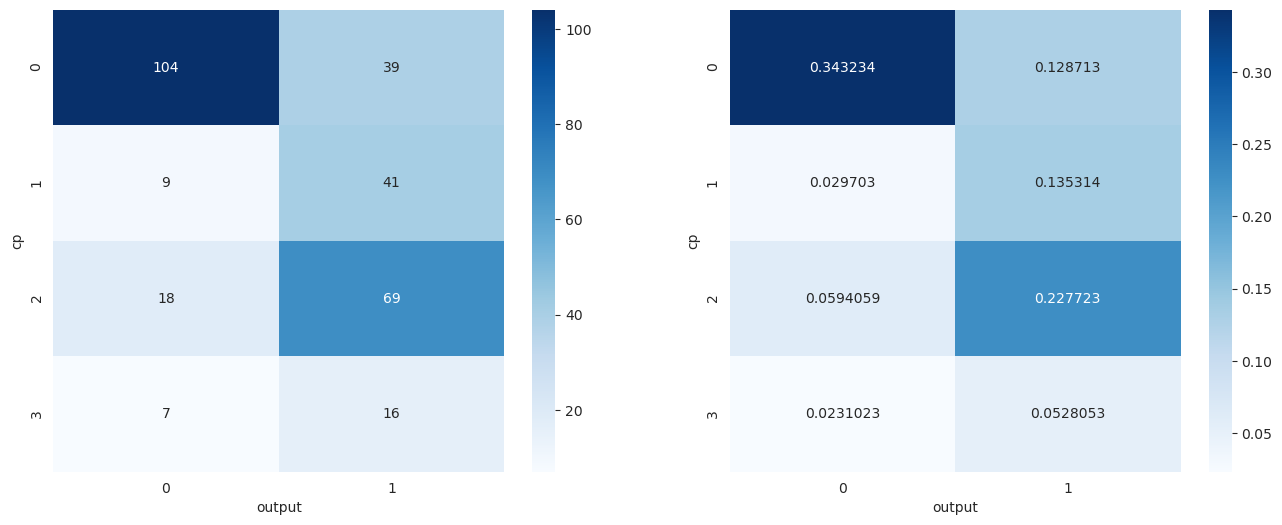

In [13]:
bivariate_cat_cat_ds(df, 'cp', 'output')

🔠 & 🔢: Vztah mezi **kategorickým a spojitým příznakem** lze zkoumat např. pomocí krabicového grafu, violin plotu nebo různých druhů histogramů:

* klasický histogram,
* skládaný (angl. stacked) histogram,
* normalizovaný histogram,
* normalizovaný skládaný histogram.

In [14]:
# bivariate descriptive statistics for categorical and continuous variable
def bivariate_cat_cont_ds(df, categorical, continuous):
    # number of unique categories
    n_categories = df[categorical].nunique()
    fig, axes = plt.subplots(3, 2, figsize=(16,16))
    
    # box plot
    box_plot = sns.boxplot(data=df, x=categorical, y=continuous, ax=axes[0][0])
    medians = df.groupby(categorical)[continuous].median()
    # offset from median for display
    vertical_offset = df[continuous].max() * 0.015

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], horizontalalignment='center')
    
    # violin plot
    sns.violinplot(data=df, x=categorical, y=continuous, ax=axes[0][1])

    # histograms
    sns.histplot(
        data=df, x=continuous, hue=categorical, element='step', 
        palette=palette[:n_categories], ax=axes[1][0]
    ).set(title='Histogram')
    
    sns.histplot(
        data=df, x=continuous, hue=categorical, multiple='stack',
        palette=palette[:n_categories], ax=axes[1][1]
    ).set(title='Stacked histogram')
        
    sns.histplot(
        data=df, x=continuous, hue=categorical, element='step', stat='probability', 
        common_norm=False,  palette=palette[:n_categories], ax=axes[2][0]
    ).set(title='Normalized histogram')
    
    sns.histplot(
        data=df, x=continuous, hue=categorical, multiple='stack', stat='probability', 
        common_norm=False, palette=palette[:n_categories], ax=axes[2][1]
    ).set(title='Normalized stacked histogram')

Podívejme se na vztah mezi příznakem _thalachh_ (maximální naměřený srdeční tep) a vysvětlovanou proměnnou _output_. 🔍

Po rozdělení dat na dvě skupiny podle hodnoty příznaku _output_ je možné vidět, že je distribuce příznaku _thalachh_ pro tyto dvě skupiny odlišná. V krabicovém grafu můžete vidět i odlišnost mediánů. 

📌 Pozn.: Rozdíl mezi klasickým a znormalizovaným histogramem je v této ukázce malý, protože v datasetu je přibližně stejně pozorování pro obě hodnoty příznaku _output_. Pro větší rozdíl si zkuste graf vykreslit např. s příznakem _fbs_.

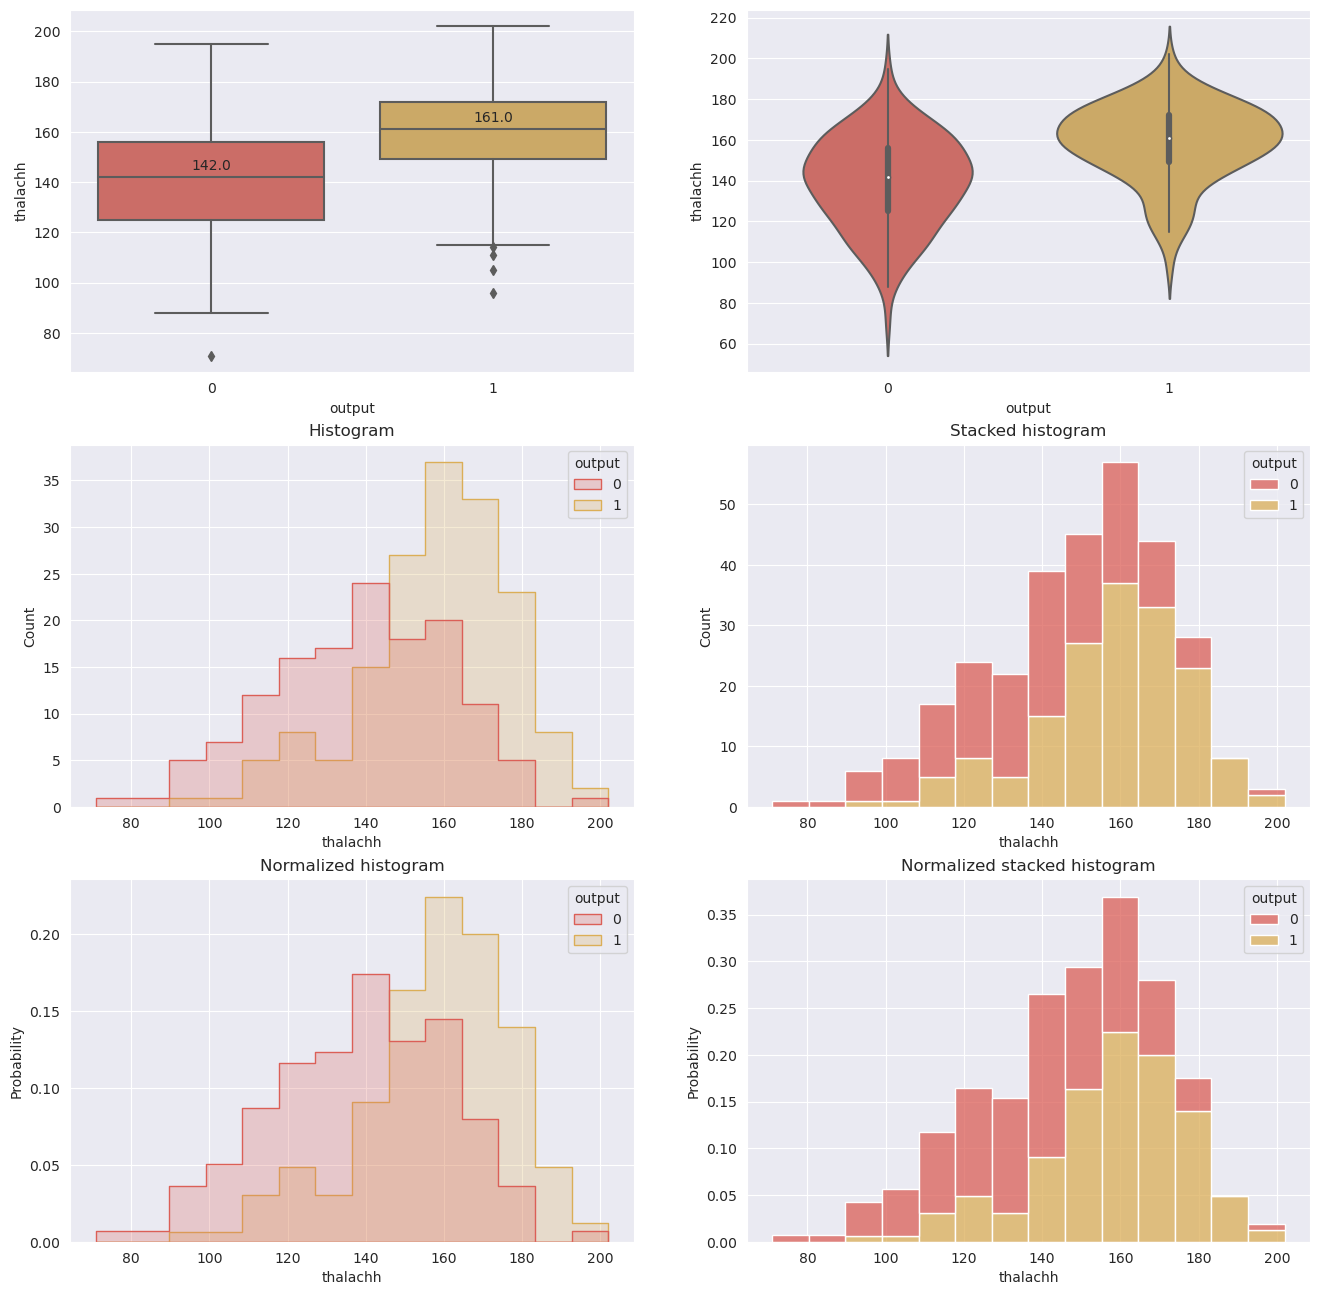

In [15]:
bivariate_cat_cont_ds(df, 'output', 'thalachh')

🔢 & 🔢: Na závěr této sekce si vytvoříme funkci pro popis vztahu **dvou spojitých příznaků**. Jejím výstupem budou hodnoty dvou korelačních koeficientů a vykreslíme si bodový graf, na kterém lze pozorovat i jiný vztah, než pouze lineární.

In [16]:
# bivariate descriptive statistics for two continuous variables
def bivariate_cont_cont_ds(df, continuous1, continuous2):
    print('Pearsonův korelační koeficient: {}'.format(df[continuous1].corr(df[continuous2])))
    print('Spearmanův korelační koeficient: {}'.format(df[continuous1].corr(df[continuous2], method='spearman')))
    
    sns.scatterplot(data=df, x=continuous1, y=continuous2)

Funkci vyzkoušíme na spojitých příznacích _thalachh_ a _oldpeak_. Z výstupu vidíme, že spolu data korelují 🔗, ale ne nijak dramaticky.

Pearsonův korelační koeficient: -0.3441869479667162
Spearmanův korelační koeficient: -0.4332405256539472


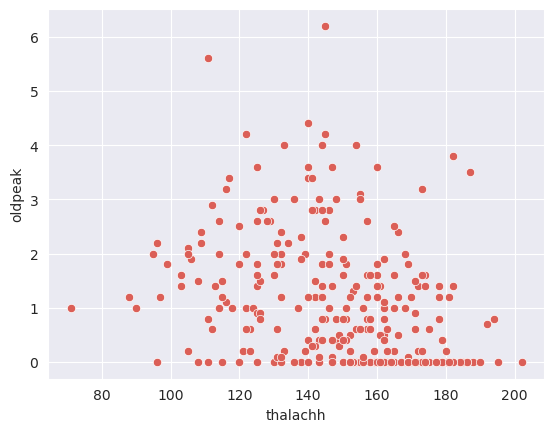

In [17]:
bivariate_cont_cont_ds(df, 'thalachh', 'oldpeak')

## 3️⃣ Vizualizace vztahu mezi třemi příznaky

Pomocí některých vizualizací jsme schopni zkoumat vztah i mezi třemi příznaky. Ukážeme si dvě takovéto vizualizace:
* bodový graf pro dva spojité příznaky s barevně odlišeným kategorickým příznakem,
* violin plot pro spojitý a kategorický příznak, kde je každá kategorie rozdělená ještě podle třetího, binárního příznaku.

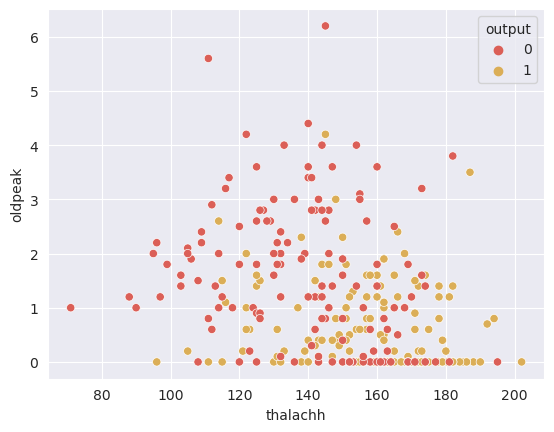

In [18]:
_ = sns.scatterplot(data=df, x='thalachh', y='oldpeak', hue='output')

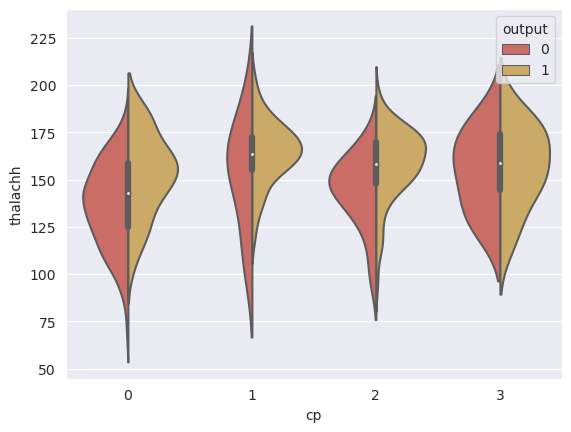

In [19]:
_ = sns.violinplot(data=df, x='cp', y='thalachh', hue='output', split=True)

Zmíněný dataset jsme ale zcela nevytěžili. Za ⭐️**domácí úkol**⭐️ můžete v analýze pokračovat a prozkoumat např. příznak `age`. Intuitivně bychom řekli, že starší lidé mají vyšší pravděpodobnost infarktu. Dokážete toto tvrzení podložit vhodným grafem? Své řešení můžete vyučující opět poslat emailem.

# 🎉 A to je pro dnešek všechno! 🎉 